In [1]:
!pip install -q kaggle 

In [2]:
!mkdir -p ~/.kaggle

In [3]:
# upload your kaggle api key 
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uqnocta","key":"86a8bbdefe0f4c7335b5997e25496f9a"}'}

In [4]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download jcprogjava/handwritten-digits-dataset-not-in-mnist

 57% 31.0M/54.6M [00:00<00:00, 136MB/s] 
100% 54.6M/54.6M [00:00<00:00, 158MB/s]


In [6]:
!unzip handwritten-digits-dataset-not-in-mnist.zip 

Streaming output truncated to the last 5000 lines.
  inflating: dataset/9/9/5499.png    
  inflating: dataset/9/9/55.png      
  inflating: dataset/9/9/550.png     
  inflating: dataset/9/9/5500.png    
  inflating: dataset/9/9/5501.png    
  inflating: dataset/9/9/5502.png    
  inflating: dataset/9/9/5503.png    
  inflating: dataset/9/9/5504.png    
  inflating: dataset/9/9/5505.png    
  inflating: dataset/9/9/5506.png    
  inflating: dataset/9/9/5507.png    
  inflating: dataset/9/9/5508.png    
  inflating: dataset/9/9/5509.png    
  inflating: dataset/9/9/551.png     
  inflating: dataset/9/9/5510.png    
  inflating: dataset/9/9/5511.png    
  inflating: dataset/9/9/5512.png    
  inflating: dataset/9/9/5513.png    
  inflating: dataset/9/9/5514.png    
  inflating: dataset/9/9/5515.png    
  inflating: dataset/9/9/5516.png    
  inflating: dataset/9/9/5517.png    
  inflating: dataset/9/9/5518.png    
  inflating: dataset/9/9/5519.png    
  inflating: dataset/9/9/552.png     

In [7]:
img_dir = "dataset"

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

(28, 28, 3)


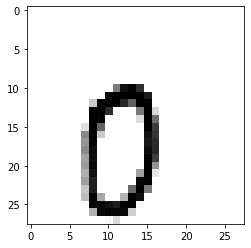

In [9]:
img_path = "dataset/0/0/1.png"

png_img = Image.open(img_path)
fn_img = Image.new("RGBA",size=png_img.size,color='white')
fn_img.paste(png_img,(0,0),png_img)

jpg_img = fn_img.convert('RGB')

arr = np.asarray(jpg_img)

print(arr.shape)


plt.imshow(arr)

In [10]:
def transform_to_jpg(img_path): 
  new_image_path = "dataset_jpg"
  for i in range(10): 
    path = os.path.join(img_path,str(i),str(i))
    new_path = os.path.join(new_image_path,str(i))
    print(new_path)
    try : 
      os.makedirs(new_path)
    except:
      print("error")
    for j in os.listdir(path): 
      filename = j.split(sep=".")
      file_name = filename[0] + ".jpg"
      png_img = Image.open(os.path.join(path,j))
      fn_img = Image.new("RGBA",size=png_img.size,color='white')
      fn_img.paste(png_img,(0,0),png_img)
      
      jpg_img = fn_img.convert('RGB')
      jpg_img.save(os.path.join(new_path,file_name))

In [11]:
transform_to_jpg("dataset")

dataset_jpg/0
dataset_jpg/1
dataset_jpg/2
dataset_jpg/3
dataset_jpg/4
dataset_jpg/5
dataset_jpg/6
dataset_jpg/7
dataset_jpg/8
dataset_jpg/9


In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

In [13]:
img_dir = "dataset_jpg"

In [14]:
data = image_dataset_from_directory(img_dir,image_size=(32,32),color_mode='rgb')

# if your dataset in rgba mode, and you do not set the color_mode ( default to 'rgb' ), then you will get black img

Found 107730 files belonging to 10 classes.


[3 1 7 7 7 4 3 7 3 7 3 8 6 9 6 8 8 0 6 7 8 2 7 0 3 9 9 7 8 2 4 4]


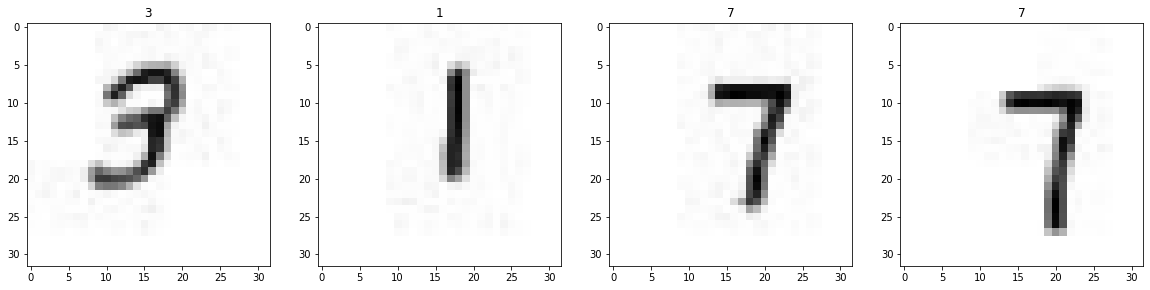

In [15]:
# check some of our image data 
batch = data.as_numpy_iterator()

preview = batch.next()

print(preview[1])

fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for index, image in enumerate(preview[0][0:4]): 
  ax[index].imshow(image.astype(int))
  ax[index].title.set_text(preview[1][index])


In [16]:
# scale data 
data = data.map(lambda x,y : (x/255,y))
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
# build the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model =Sequential()

In [23]:
from keras import backend as K
print(K.image_data_format()) # print current format

channels_last


In [24]:
model.add(Conv2D(16, (3,3),1,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [27]:
# logdir='logs'
# callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
callback = EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
2356/2356 [==============================] - 58s 21ms/step - loss: 0.0836 - accuracy: 0.9725 - val_loss: 6.0768e-04 - val_accuracy: 1.0000
Epoch 2/20
2356/2356 [==============================] - 49s 21ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 2.5486e-05 - val_accuracy: 1.0000
Epoch 3/20
2356/2356 [==============================] - 48s 20ms/step - loss: 2.1412e-05 - accuracy: 1.0000 - val_loss: 5.3422e-06 - val_accuracy: 1.0000
Epoch 4/20
2356/2356 [==============================] - 47s 20ms/step - loss: 2.5424e-06 - accuracy: 1.0000 - val_loss: 1.7993e-06 - val_accuracy: 1.0000
Epoch 5/20
2356/2356 [==============================] - 47s 20ms/step - loss: 7.7399e-07 - accuracy: 1.0000 - val_loss: 8.8860e-07 - val_accuracy: 1.0000
Epoch 6/20
2356/2356 [==============================] - 48s 21ms/step - loss: 2.5384e-07 - accuracy: 1.0000 - val_loss: 2.8188e-07 - val_accuracy: 1.0000
Epoch 7/20
2356/2356 [==============================] - 51s 22ms/step - loss: 8.2167

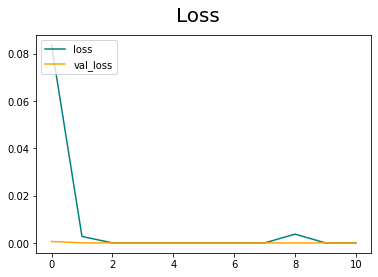

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

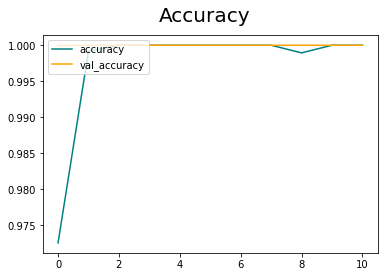

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
model.save('lurah_cnn_handwriting_classifier_rgb_1.h5')

In [31]:
from tensorflow.keras.metrics import Accuracy

In [32]:
acc = Accuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
  X,y_list = batch
  y_prob_list = model.predict(X)
  yhat_list = []
  for i,yprob in enumerate(y_prob_list) : 
    yhat = np.argmax(yprob)
    yhat_list.append(yhat_list)
    acc.update_state(y_list[i],yhat)
  
  
  
    
  

1/1 [==============================] - 0s 19ms/step


In [34]:
print(acc.result())

tf.Tensor(1.0, shape=(), dtype=float32)
